# Problem 1

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.  

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:
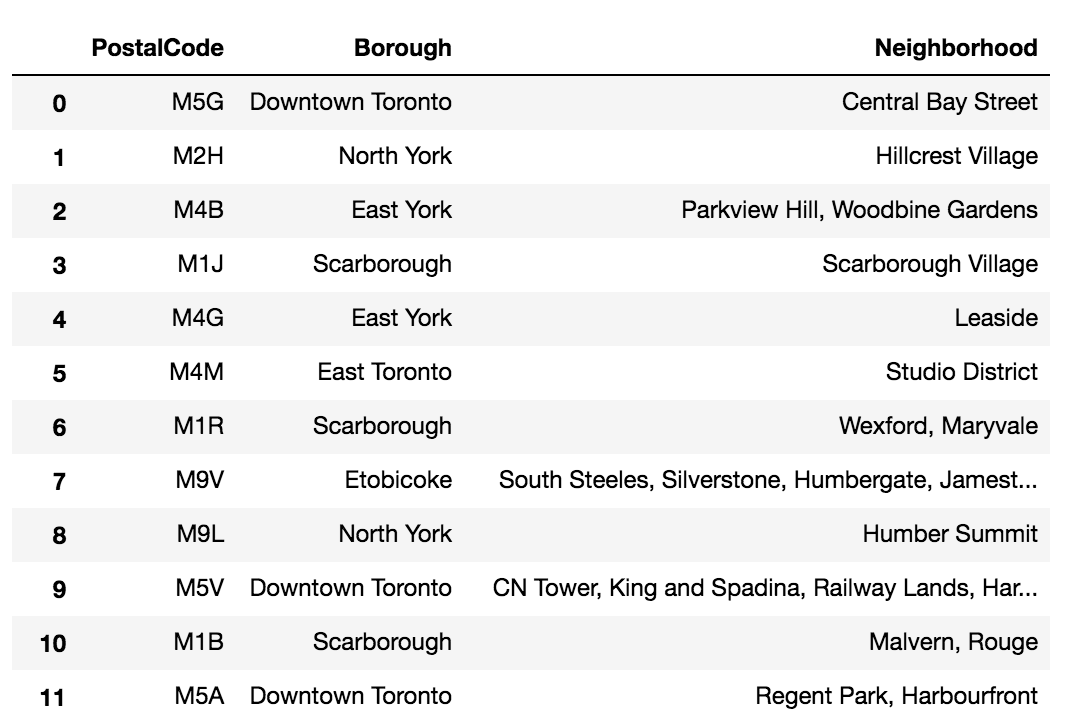


3. To create the above dataframe:
    - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice - that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
    - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
    - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
    
    
4. Submit a link to your Notebook on your Github repository. (10 marks)

    Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

    Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

    The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

    Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XpgjYwpAICkAAKKQLqkAAACN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":951266227,"wgRevisionId":951266227,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

In [3]:
table=soup.find('table',class_="wikitable")
print(table.prettify())

<table class="wikitable sortable">
 <tbody>
  <tr>
   <th>
    Postal code
   </th>
   <th>
    Borough
   </th>
   <th>
    Neighborhood
   </th>
  </tr>
  <tr>
   <td>
    M1A
   </td>
   <td>
    Not assigned
   </td>
   <td>
   </td>
  </tr>
  <tr>
   <td>
    M2A
   </td>
   <td>
    Not assigned
   </td>
   <td>
   </td>
  </tr>
  <tr>
   <td>
    M3A
   </td>
   <td>
    North York
   </td>
   <td>
    Parkwoods
   </td>
  </tr>
  <tr>
   <td>
    M4A
   </td>
   <td>
    North York
   </td>
   <td>
    Victoria Village
   </td>
  </tr>
  <tr>
   <td>
    M5A
   </td>
   <td>
    Downtown Toronto
   </td>
   <td>
    Regent Park / Harbourfront
   </td>
  </tr>
  <tr>
   <td>
    M6A
   </td>
   <td>
    North York
   </td>
   <td>
    Lawrence Manor / Lawrence Heights
   </td>
  </tr>
  <tr>
   <td>
    M7A
   </td>
   <td>
    Downtown Toronto
   </td>
   <td>
    Queen's Park / Ontario Provincial Government
   </td>
  </tr>
  <tr>
   <td>
    M8A
   </td>
   <td>
    Not assig

In [4]:
# build dataframe

import pandas as pd

column_names = ['PostalCode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

for tr in table.find_all('tr'):
    row=[]
    for td in tr.find_all('td'):
        row.append(td.text.strip().replace(' / ',', ')) # row with the neighborhoods separated with a comma
    if len(row)==3:
        df.loc[len(df)]=row
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
# Ignore cells with a borough that is Not assigned
df=df[df['Borough']!='Not assigned']

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df.loc[df['Neighborhood'] =='Not assigned' , 'Neighborhood'] = df['Borough']

df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
df.shape

(103, 3)

# Problem 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [7]:
# !wget -q -O Geospatial_data.csv http://cocl.us/Geospatial_data
df_geo = pd.read_csv('Geospatial_data.csv')
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
df_geo.rename(columns={'Postal Code':'PostalCode'},inplace=True)
df_merge = pd.merge(df_geo, df, on='PostalCode')
df_merge.head()

,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


# Problem 3

Explore and cluster the neighborhoods in Toronto.

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [10]:
CLIENT_ID = 'DFRILMMDBC2EOSDFVU3N2LS3ICSWSQ322E0OCJCABQV0SOFY' # your Foursquare ID
CLIENT_SECRET = 'WC2V5OO4LBAAPJTFSPH0KINMA1UCU15BKL0IRY5CXZ2UMKAO' # your Foursquare Secret
VERSION = '20180604'

In [11]:
toronto_data=df_merge[df_merge['Borough'].str.contains("Toronto")]
toronto_data.head()

,PostalCode,Latitude,Longitude,Borough,Neighborhood
37,M4E,43.676357,-79.293031,East Toronto,The Beaches
41,M4K,43.679557,-79.352188,East Toronto,"The Danforth West, Riverdale"
42,M4L,43.668999,-79.315572,East Toronto,"India Bazaar, The Beaches West"
43,M4M,43.659526,-79.340923,East Toronto,Studio District
44,M4N,43.728020,-79.388790,Central Toronto,Lawrence Park


## Explore Neighborhoods

In [12]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
toronto_venues.head()

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst
 Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction South
Parkdale, Ro

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [14]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
Business reply mail Processing CentrE,16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst\n Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,64,64,64,64,64,64
Christie,18,18,18,18,18,18
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [15]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
toronto_onehot.insert(loc=0, column='Neighborhood', value=toronto_venues['Neighborhood'] )
toronto_onehot.shape

(1635, 231)

In [16]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0000,0.017857,0.0,0.017857,0.035714,0.0,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.017857,0.0,0.000000,0.0,0.000000,0.0,0.017857,0.0000,0.00000,0.0,0.00000,0.000000,0.0,0.017857,0.035714,0.0,0.0,0.0,0.035714,0.000000,0.0,0.0,0.000000,0.0,0.035714,0.053571,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.000000,0.017857,0.0,0.017857,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.035714,0.0000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.017857,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,

In [17]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.05
1        Cocktail Bar  0.04
2  Seafood Restaurant  0.04
3      Farmers Market  0.04
4  Italian Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3       Nightclub  0.09
4    Intersection  0.04


----Business reply mail Processing CentrE----
                venue  freq
0         Yoga Studio  0.06
1             Brewery  0.06
2       Garden Center  0.06
3              Garden  0.06
4  Light Rail Station  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst
 Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.14
1           Airport  0.07
2      Airport Gate  0.07
3    Airport Lounge  0.07
4  Airport Terminal  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.19
1  Italian Restaurant  0.06
2      San

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Beer Bar,Restaurant,Cheese Shop,Cocktail Bar,Bakery,Italian Restaurant,Seafood Restaurant,Farmers Market,Café
1,"Brockton, Parkdale Village, Exhibition Place",Café,Nightclub,Coffee Shop,Breakfast Spot,Gym,Bakery,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
2,Business reply mail Processing CentrE,Yoga Studio,Smoke Shop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Light Rail Station,Comic Shop,Park,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport,Harbor / Marina,Bar,Coffee Shop,Sculpture Garden,Boat or Ferry,Boutique,Rental Car Location,Airport Terminal
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Spa,Burger Joint,Japanese Restaurant,Sushi Restaurant,Bubble Tea Shop,Salad Place


## Cluster Neighborhoods

In [20]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 2, 0,
       0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [21]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Latitude,Longitude,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,43.676357,-79.293031,East Toronto,The Beaches,2,Health Food Store,Pub,Trail,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
41,M4K,43.679557,-79.352188,East Toronto,"The Danforth West, Riverdale",0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Furniture / Home Store,Restaurant,Ice Cream Shop,Spa,Juice Bar,Brewery
42,M4L,43.668999,-79.315572,East Toronto,"India Bazaar, The Beaches West",0,Sandwich Place,Fast Food Restaurant,Gym,Food & Drink Shop,Burrito Place,Board Shop,Italian Restaurant,Steakhouse,Fish & Chips Shop,Sushi Restaurant
43,M4M,43.659526,-79.340923,East Toronto,Studio District,0,Café,Coffee Shop,Bakery,Gastropub,American Restaurant,Brewery,Yoga Studio,Fish Market,Italian Restaurant,Bookstore
44,M4N,43.728020,-79.388790,Central Toronto,Lawrence Park,4,Park,Swim School,Bus Line,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [22]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.6534817, -79.3839347.


### Map

In [23]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters